In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-02-15 17:52:41.442810: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 17:52:41.442911: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 17:52:41.573397: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/harry-potter-reviews/harry_potter_reviews.csv


<a id = ''></a><br>
## First Look Data

In [2]:
df = pd.read_csv('/kaggle/input/harry-potter-reviews/harry_potter_reviews.csv')
df  

,user_id,user_sex,user_age,user_country,rating,comment,favourite_character,date
0,0,female,50,Germany,2.5,"""The transitions between scenes were awkward, ...",Severus Snape,2004-12-27
1,1,female,23,Spain,4.0,"""Severus Snape's role adds an intriguing layer.""",Severus Snape,2003-11-22
2,2,male,32,France,3.0,"""The pacing was a bit slow, but the characters...",Ron Weasley,2005-09-16
3,3,female,24,Turkey,4.5,"""Hagrid's love for magical creatures is heartw...",Rubeus Hagrid,2002-09-17
4,4,female,40,Spain,5.0,"""Neville Longbottom's courage is awe-inspiring.""",Neville Longbottom,2004-10-17
...,...,...,...,...,...,...,...,...
486,486,female,41,Belgium,2.0,"""The soundtrack failed to enhance the emotiona...",Hermione Granger,2003-05-22
487,487,female,30,Turkey,4.0,"""I enjoyed the soundtrack and the magical feel...",Hermione Granger,2005-03-16
488,488,female,33,Greece,4.5,"""Albus Dumbledore's wisdom resonates with the ...",Albus Dumbledore,2003-07-03
489,489,male,28,Spain,4.0,"""The characters' growth is heartwarming.""",Hermione Granger,2002-11-10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              491 non-null    int64  
 1   user_sex             491 non-null    object 
 2   user_age             491 non-null    int64  
 3   user_country         491 non-null    object 
 4   rating               491 non-null    float64
 5   comment              491 non-null    object 
 6   favourite_character  491 non-null    object 
 7   date                 491 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 30.8+ KB


In [4]:
def show_null_data(data):
    null_count = data.isna().sum()
    null_percent = data.isna().sum() / len(data)
    null_percent = null_percent.apply(lambda x: f"{x:.1%}")
    print("Duplicated Data: ", data.duplicated().sum())
    result = pd.concat([null_count, null_percent], axis=1)
    result.columns = (['Null Count', 'Null Percentage'])
    return result
show_null_data(df)

Duplicated Data:  0


,Null Count,Null Percentage
user_id,0,0.0%
user_sex,0,0.0%
user_age,0,0.0%
user_country,0,0.0%
rating,0,0.0%
comment,0,0.0%
favourite_character,0,0.0%
date,0,0.0%


In [5]:
df.comment[df.comment.duplicated()]

43     "Severus Snape's complexity adds depth to the ...
45     "Hagrid's love for magical creatures is heartw...
51     "The pacing dragged, and the visual effects we...
65     "Severus Snape's complexity adds depth to the ...
106    "The transitions between scenes felt forced, a...
110    "Hagrid's love for magical creatures is heartw...
121    "The soundtrack failed to capture the magic of...
133    "Hermione Granger's intelligence feels exagger...
137    "Rubeus Hagrid's love for magical creatures is...
146    "Albus Dumbledore's presence feels forced and ...
155    "The film's production design lacks attention ...
165    "Hagrid's love for magical creatures is heartw...
181    "Draco Malfoy's character development is impre...
233    "Draco Malfoy's cunning adds a layer of suspen...
234    "The visual effects were lackluster, and the p...
242    "Draco Malfoy's character lacks depth and comp...
251    "The magical world is brought to life with stu...
258    "The visual effects were

### Great there is no missing data.

In [6]:
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['datetime']

0     2004-12-27
1     2003-11-22
2     2005-09-16
3     2002-09-17
4     2004-10-17
         ...    
486   2003-05-22
487   2005-03-16
488   2003-07-03
489   2002-11-10
490   2002-05-18
Name: datetime, Length: 491, dtype: datetime64[ns]

In [7]:
df.set_index(df['datetime'], inplace=True)
df.drop(['datetime', 'date'], axis=1, inplace=True)

In [8]:
df

,user_id,user_sex,user_age,user_country,rating,comment,favourite_character
datetime,,,,,,,
2004-12-27,0,female,50,Germany,2.5,"""The transitions between scenes were awkward, ...",Severus Snape
2003-11-22,1,female,23,Spain,4.0,"""Severus Snape's role adds an intriguing layer.""",Severus Snape
2005-09-16,2,male,32,France,3.0,"""The pacing was a bit slow, but the characters...",Ron Weasley
2002-09-17,3,female,24,Turkey,4.5,"""Hagrid's love for magical creatures is heartw...",Rubeus Hagrid
2004-10-17,4,female,40,Spain,5.0,"""Neville Longbottom's courage is awe-inspiring.""",Neville Longbottom
...,...,...,...,...,...,...,...
2003-05-22,486,female,41,Belgium,2.0,"""The soundtrack failed to enhance the emotiona...",Hermione Granger
2005-03-16,487,female,30,Turkey,4.0,"""I enjoyed the soundtrack and the magical feel...",Hermione Granger
2003-07-03,488,female,33,Greece,4.5,"""Albus Dumbledore's wisdom resonates with the ...",Albus Dumbledore


In [9]:
df[df.user_country == 'Turkey']

,user_id,user_sex,user_age,user_country,rating,comment,favourite_character
datetime,,,,,,,
2002-09-17,3,female,24,Turkey,4.5,"""Hagrid's love for magical creatures is heartw...",Rubeus Hagrid
2005-12-02,9,female,46,Turkey,4.5,"""Hermione Granger's determination is inspiring.""",Hermione Granger
2003-11-25,27,female,50,Turkey,5.0,"""The soundtrack is a masterpiece, enhancing th...",Hermione Granger
2002-07-13,30,female,47,Turkey,5.0,"""Spellbinding performances from the cast.""",Hermione Granger
2005-05-30,45,male,35,Turkey,4.0,"""Hagrid's love for magical creatures is heartw...",Rubeus Hagrid
2004-06-26,51,female,25,Turkey,2.0,"""The pacing dragged, and the visual effects we...",Ron Weasley
2005-07-10,55,other,26,Turkey,5.0,"""The trio's chemistry is heartwarming.""",Hermione Granger
2004-07-11,66,male,19,Turkey,4.5,"""Draco Malfoy's character development is well-...",Draco Malfoy
2002-11-10,67,male,52,Turkey,4.5,"""Albus Dumbledore's philosophical dialogues re...",Albus Dumbledore


<a id = ''></a><br>
## Data Visualization

In [10]:
fig = px.pie(df, names='user_sex', hole=0.3, template='plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+value', title='Distribution of Sex reviewed')
fig.show()

In [11]:
fig = px.histogram(df, x='user_sex', y='user_age', pattern_shape='user_age', color='user_sex', template='plotly_dark', title='Distribution of Age by Sex')
fig.show()

In [12]:
fig = px.histogram(df, x='user_age', y='rating', pattern_shape='user_sex', color='rating', marginal='rug', template='plotly_dark', title='Distribution of rating by sex and age')
fig.show()

In [13]:
df_grouped = df.groupby(['user_sex', 'user_country']).size().reset_index(name='count')
fig = px.bar(df_grouped, x='user_sex', y='count', color='user_country', template='plotly_dark', title='Distribution of sex by countries')
fig.show()

In [14]:
fig = px.histogram(df, x='favourite_character', y='user_age', pattern_shape='user_age',color='favourite_character', template='plotly_dark', title='Distribution of favourite_character by age')
fig.show()

In [15]:
fig = px.histogram(df, x=df.index, y='rating', pattern_shape='rating', color='rating', template='plotly_dark', marginal='rug', title='Distribution of rating by time')
fig.show()

In [16]:
# plt.figure(figsize=(9, 3))
# sns.histplot(df, x='rating', hue='datetime', kde=True)
# plt.xlabel(df.rating)
# plt.ylabel("Datetime")
# plt.title(f"Test")
# plt.show()

<a id = ''></a><br>
## Preprocessing Data

In [17]:
df.user_sex.unique()

array(['female', 'male', 'other'], dtype=object)

In [18]:
import re

def clean_text(text):
    text = tf.strings.lower(text).numpy().decode('utf-8')
    text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
    return text

df.comment = df.comment.apply(clean_text)

In [19]:
df.comment.sample(10)

datetime
2005-08-02    the soundtrack failed to capture the magic of ...
2005-10-18    the visual effects brought the magical world t...
2003-10-04    the film captures the essence of the wizarding...
2005-01-26       a magical journey that leaves you wanting more
2004-04-27     neville longbottoms courage is truly commendable
2002-03-27    the special effects are subpar and take away f...
2002-11-10                    enjoyed the plot twists and turns
2002-09-28    the smooth transitions between scenes enhanced...
2002-10-22      the cultural references add depth and relevance
2002-11-20                    spellbinding from start to finish
Name: comment, dtype: object

In [20]:
df2 = df.copy()

In [21]:
df2.user_sex = [1 if i == 'male' else 0 if i == 'female' else 2 for i in df2.user_sex]
df2

,user_id,user_sex,user_age,user_country,rating,comment,favourite_character
datetime,,,,,,,
2004-12-27,0,0,50,Germany,2.5,the transitions between scenes were awkward an...,Severus Snape
2003-11-22,1,0,23,Spain,4.0,severus snapes role adds an intriguing layer,Severus Snape
2005-09-16,2,1,32,France,3.0,the pacing was a bit slow but the characters w...,Ron Weasley
2002-09-17,3,0,24,Turkey,4.5,hagrids love for magical creatures is heartwar...,Rubeus Hagrid
2004-10-17,4,0,40,Spain,5.0,neville longbottoms courage is aweinspiring,Neville Longbottom
...,...,...,...,...,...,...,...
2003-05-22,486,0,41,Belgium,2.0,the soundtrack failed to enhance the emotional...,Hermione Granger
2005-03-16,487,0,30,Turkey,4.0,i enjoyed the soundtrack and the magical feel ...,Hermione Granger
2003-07-03,488,0,33,Greece,4.5,albus dumbledores wisdom resonates with the au...,Albus Dumbledore


In [22]:
df2 = pd.get_dummies(df2, columns=['favourite_character', 'user_country'])

<a id = ''></a><br>
## Vader Sentiment Analysis

In [23]:
!pip install vaderSentiment # Installing framework for decide comment sentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.6 MB/s eta 0:00:00


In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_label(score):
    if score >= 0.05:
        return "positive"
    else:
        return "negative"

def analyze_sentiment(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_label(sentiment_dict['compound'])

data = {'comment': ['positive', 'negative']}

df2['sentiment'] = df2['comment'].apply(analyze_sentiment)

In [25]:
df2

,user_id,user_sex,user_age,rating,comment,favourite_character_Albus Dumbledore,favourite_character_Draco Malfoy,favourite_character_Harry Potter,favourite_character_Hermione Granger,favourite_character_Neville Longbottom,...,user_country_France,user_country_Germany,user_country_Greece,user_country_Netherlands,user_country_Spain,user_country_Sweden,user_country_Switzerland,user_country_Turkey,user_country_United Kingdom,sentiment
datetime,,,,,,,,,,,,,,,,,,,,,
2004-12-27,0,0,50,2.5,the transitions between scenes were awkward an...,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,negative
2003-11-22,1,0,23,4.0,severus snapes role adds an intriguing layer,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,negative
2005-09-16,2,1,32,3.0,the pacing was a bit slow but the characters w...,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,positive
2002-09-17,3,0,24,4.5,hagrids love for magical creatures is heartwar...,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,positive
2004-10-17,4,0,40,5.0,neville longbottoms courage is aweinspiring,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-05-22,486,0,41,2.0,the soundtrack failed to enhance the emotional...,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,negative
2005-03-16,487,0,30,4.0,i enjoyed the soundtrack and the magical feel ...,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,positive
2003-07-03,488,0,33,4.5,albus dumbledores wisdom resonates with the au...,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,positive


<a id = ''></a><br>
## Naive Bayes

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
import optuna

# Split reviews and labels
reviews = df2['comment'].values
labels = df2['sentiment'].values

# Consider label encoding if `labels` are text-based
le = LabelEncoder()
encoded_y = le.fit_transform(labels)

# Splitting train, test
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_y, test_size=0.2, random_state=42)

def vectorize_text(train_input, test_input):
    vct = CountVectorizer()  # Move fitting inside for each trial to prevent leakage
    train_sentences_counts = vct.fit_transform(train_input)
    test_sentences_counts = vct.transform(test_input)
    train_sentences_dense = train_sentences_counts.toarray()
    test_sentences_dense = test_sentences_counts.toarray()
    return train_sentences_dense, test_sentences_dense

def objective_function(trial):
    params = {
        'alpha': trial.suggest_float("alpha", 1e-5, 1.0),
        'force_alpha': trial.suggest_categorical("force_alpha", [True, False]),
        'fit_prior': trial.suggest_categorical("fit_prior", [True, False])
    }

    # Move vectorization inside here
    train_sentences_dense, test_sentences_dense = vectorize_text(train_sentences, test_sentences)

    model = BernoulliNB(**params)
    model.fit(train_sentences_dense, train_labels)
    score = model.score(test_sentences_dense, test_labels)
    return score

train_sentences_dense, test_sentences_dense = vectorize_text(train_sentences, test_sentences)

study = optuna.create_study()
optuna.logging.set_verbosity(optuna.logging.ERROR)
study.optimize(objective_function, n_trials=100)
best_value = study.best_value
best_params = study.best_params

print('_' * 30)
print('Best Score:', best_value)
print('_' * 30)
print('Best Params:', best_params)

# Evaluate the best model with comprehensive metrics
best_model = BernoulliNB(**best_params)  # Create model with best params
best_model.fit(train_sentences_dense, train_labels)
predictions = best_model.predict(test_sentences_dense)

[I 2024-02-15 17:53:17,818] A new study created in memory with name: no-name-04a32a19-6760-4807-b0a3-f65d803f34ab


______________________________
Best Score: 0.8080808080808081
______________________________
Best Params: {'alpha': 0.9795902207635168, 'force_alpha': True, 'fit_prior': False}


<a id = ''></a><br>
## Residuals

In [27]:
print('_' * 30)
print("classification report:\n", classification_report(test_labels, predictions))
print('_' * 30)

______________________________
classification report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        50
           1       0.78      0.86      0.82        49

    accuracy                           0.81        99
   macro avg       0.81      0.81      0.81        99
weighted avg       0.81      0.81      0.81        99

______________________________


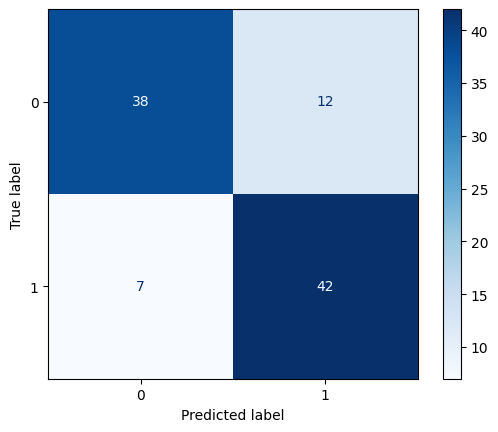

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model,test_sentences_dense, test_labels, cmap="Blues")

### Thanks for inspecting my notebook you can check also my other notebooks. If u have any advice please contact me. Don't forget to upvote. 🍉